## Learned Methods for Reconstruction
In this notebook we'll look at methods which use outside training data to perform denoising. The high-level idea is that by utilizing existing clean images, we can identify structures common between the noisy and clean data, which we'll use to do reconstruction.

The first approach we'll look at, dictionary learning, is the more straightforward and interpretable of the two. Our second method will utilize a neural network, which will be pretrained and is mainly for demonstration purposes.

First, to start off, let's load our test image, as usual.

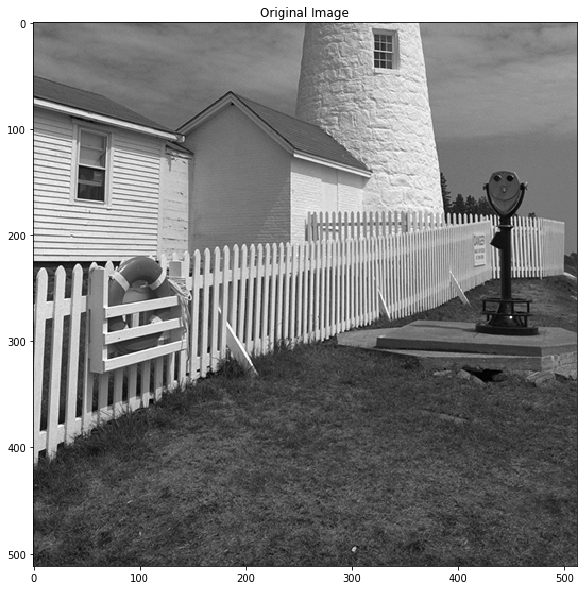

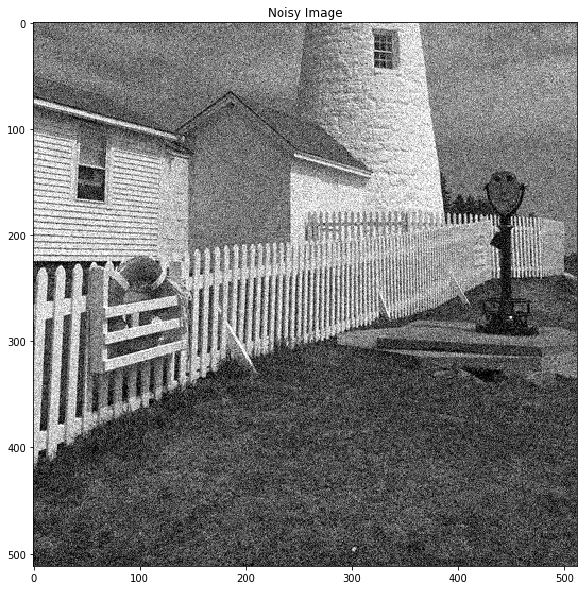

In [1]:
import imageio, os, utils
import numpy as np
import matplotlib.pyplot as plt
import corruption_models
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

cwd = os.getcwd()
image_folder = cwd + "/images/"
example_image_path = image_folder + "lighthouse.png"
test_image = utils.normalize_to_01(imageio.imread(example_image_path))
noise_sigma = 0.1
noisy_image = corruption_models.add_gaussian_noise(test_image, sigma=noise_sigma)

fig = plt.figure()
plt.imshow(test_image, cmap='gray'); plt.title('Original Image')
plt.show()

fig = plt.figure()
plt.imshow(noisy_image, cmap='gray'); plt.title('Noisy Image')
plt.show()


### Deep Denoising
Now we will demonstrate the results you get when using a deep (residual) network to do denoising. Note that we actually define the class for the neural network - this is for illustration purposes and also because of a quirk in how PyTorch deals with loading models.

You may get scary-looking warnings as this runs - as long as the code completes you're okay. Neural network libraries are notorious for generating lots of warnings.

/Users/dgilton/anaconda3/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'deep_denoiser.DnCNN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/dgilton/anaconda3/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/Users/dgilton/anaconda3/lib/python3.6/site-packages/torch/serialization.py:453: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the obje

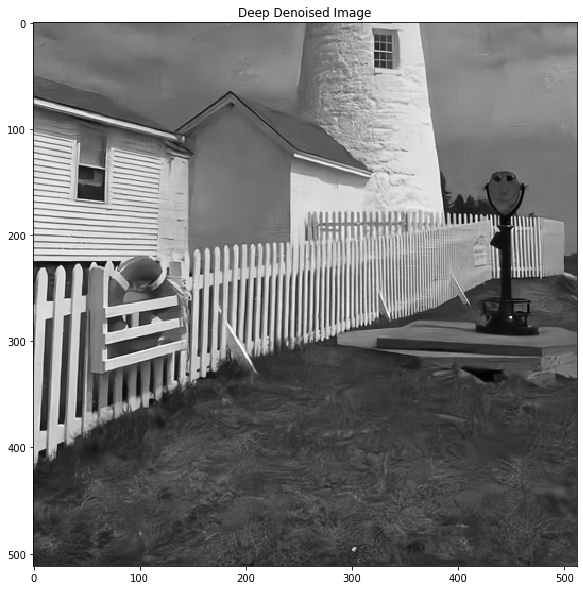

In [2]:
import deep_denoiser
from deep_denoiser import DnCNN
import torch
import torch.nn as nn
import torch.nn.init as init

# class DnCNN(nn.Module):

#     def __init__(self, depth=17, n_channels=64, image_channels=1, use_bnorm=True, kernel_size=3):
#         super(DnCNN, self).__init__()
#         kernel_size = 3
#         padding = 1
#         layers = []
#         layers.append(nn.Conv2d(in_channels=image_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=True))
#         layers.append(nn.ReLU(inplace=True))
#         for _ in range(depth-2):
#             layers.append(nn.Conv2d(in_channels=n_channels, out_channels=n_channels, kernel_size=kernel_size, padding=padding, bias=False))
#             layers.append(nn.BatchNorm2d(n_channels, eps=0.0001, momentum=0.95))
#             layers.append(nn.ReLU(inplace=True))
#         layers.append(nn.Conv2d(in_channels=n_channels, out_channels=image_channels, kernel_size=kernel_size, padding=padding, bias=False))
#         self.dncnn = nn.Sequential(*layers)
#         self._initialize_weights()

#     def forward(self, x):
#         y = x
#         out = self.dncnn(x)
#         return y-out

#     def _initialize_weights(self):
#         for m in self.modules():
#             if isinstance(m, nn.Conv2d):
#                 init.orthogonal_(m.weight)
#                 print('init weight')
#                 if m.bias is not None:
#                     init.constant_(m.bias, 0)
#             elif isinstance(m, nn.BatchNorm2d):
#                 init.constant_(m.weight, 1)
#                 init.constant_(m.bias, 0)

    
deep_denoised_reconstruction = deep_denoiser.denoise_with_network(noisy_image)

fig = plt.figure()
plt.imshow(deep_denoised_reconstruction, cmap='gray'); plt.title('Deep Denoised Image')
plt.show()

#### Residual Learning
If you examine the class definition, you may see that the network does not learn the clean image, but rather learns a *residual*. We can see what the network learns to produce via the following. Is the result just noise? You may also find it interesting to explore what kinds of residuals other methods produce.

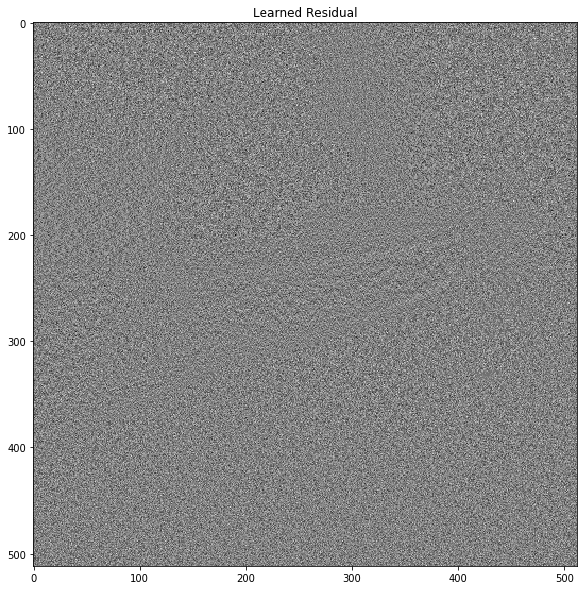

In [3]:
residual = noisy_image - deep_denoised_reconstruction
fig = plt.figure()
plt.imshow(residual, cmap='gray'); plt.title('Learned Residual')
plt.show()